In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

# Risco de crédito

In [3]:
with open('risco_credito.pkl', 'rb') as f:
    x_risco, y_risco = pickle.load(f)

In [4]:
x_risco

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [5]:
y_risco

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
arvore_risco = DecisionTreeClassifier(criterion='entropy')
arvore_risco.fit(x_risco, y_risco)

DecisionTreeClassifier(criterion='entropy')

In [7]:
# IMPORTANCIA DE CADA ATRIBUTO
arvore_risco.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

[Text(0.5555555555555556, 0.9166666666666666, 'x[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.3333333333333333, 0.75, 'x[0] <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.25, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5555555555555556, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.

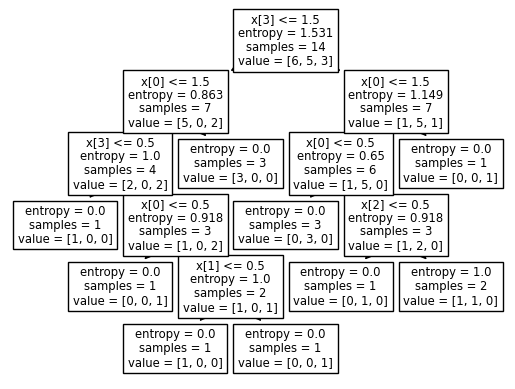

In [11]:
tree.plot_tree(arvore_risco)

In [16]:
arvore_risco.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

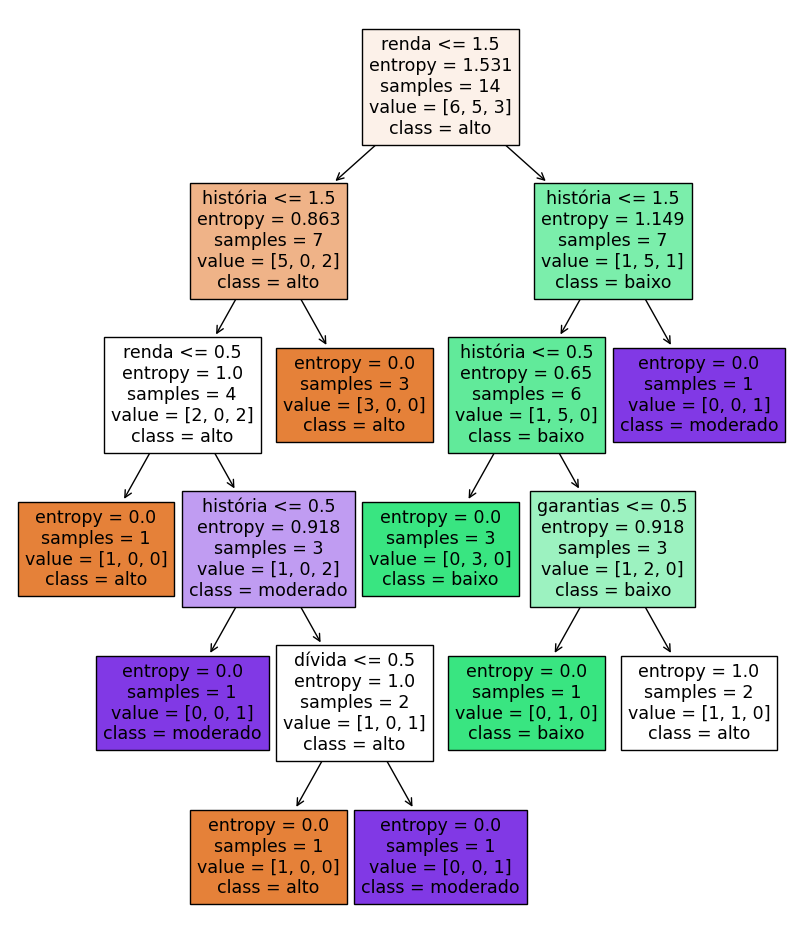

In [20]:
previsores = ['história', 'dívida', 'garantias', 'renda']
fig, axs = plt.subplots(1, 1, figsize=(10,12))
tree.plot_tree(arvore_risco, feature_names=previsores, class_names=arvore_risco.classes_, filled=True);

In [21]:
previsoes = arvore_risco.predict([[0,0,1,2], [2,0,0,0]]) # Mesmos valores utilizados no Naive-Bayes
previsoes

array(['baixo', 'alto'], dtype=object)

# Base Credit

In [22]:
with open('credit.pkl', 'rb') as f:
    x_credit_trein, y_credit_trein, x_credit_test, y_credit_test = pickle.load(f)

In [23]:
x_credit_trein.shape, y_credit_trein.shape

((1500, 3), (1500,))

In [24]:
x_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [25]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(x_credit_trein, y_credit_trein)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
previsoes = arvore_credit.predict(x_credit_test)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
accuracy_score(y_credit_test, previsoes)

0.982

0.982

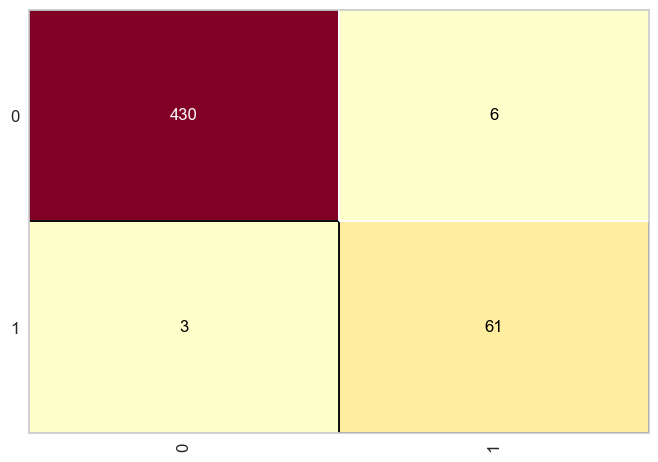

In [32]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_trein, y_credit_trein)
cm.score(x_credit_test, y_credit_test)

In [33]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



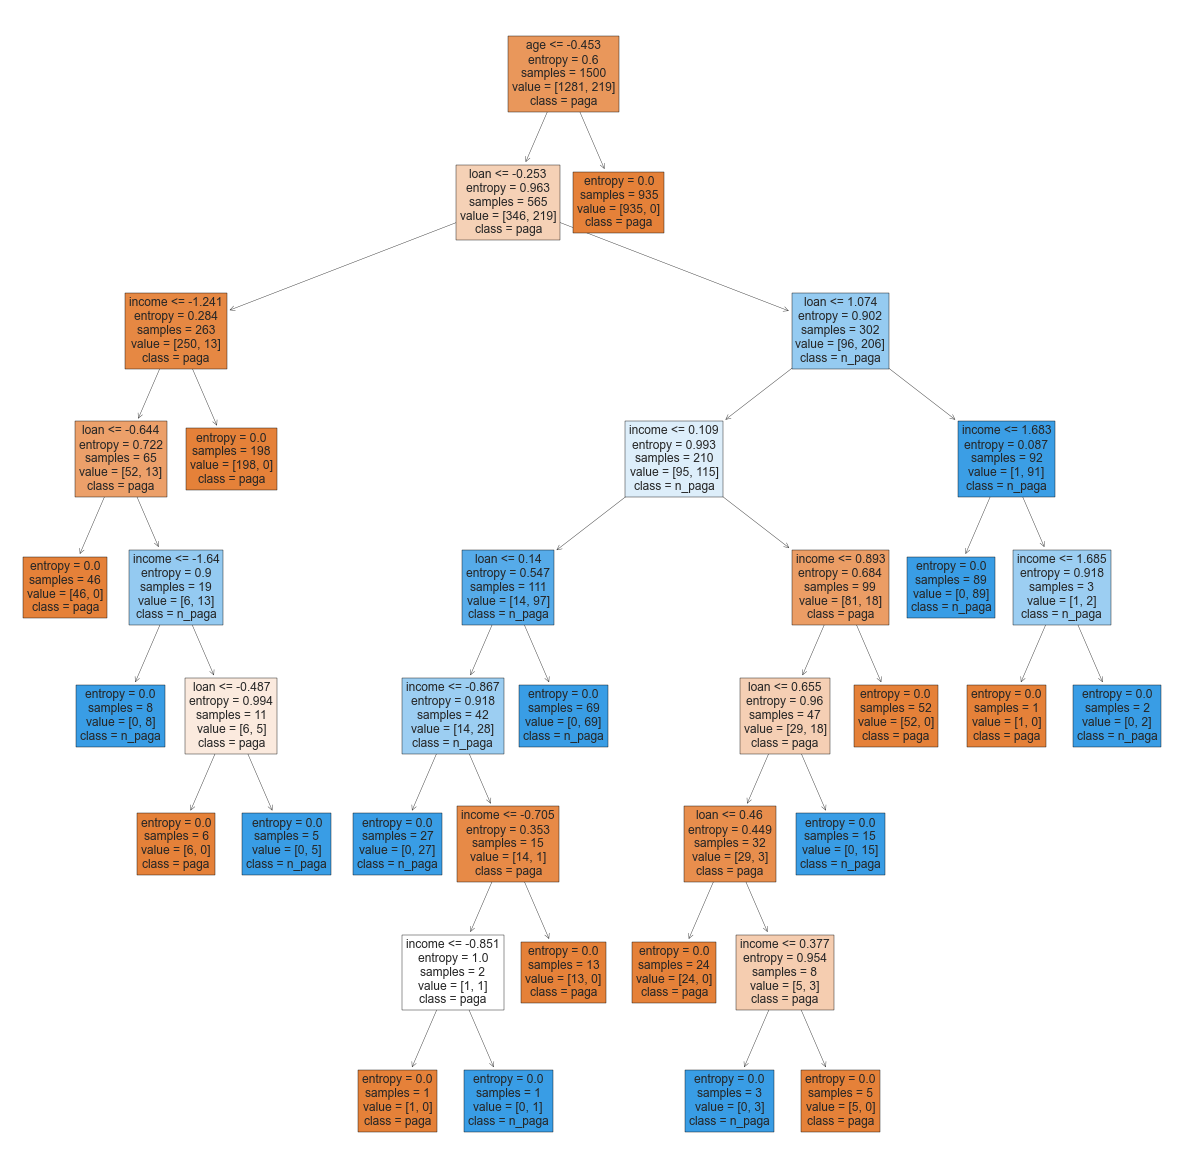

In [35]:
previsores = ['income', 'age', 'loan']
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['paga', 'n_paga'], filled=True);
fig.savefig('arvore_credit.png')

# Base Census

In [36]:
with open('census.pkl', 'rb') as f:
    x_census_trein, y_census_trein, x_census_test, y_census_test = pickle.load(f)

In [37]:
x_census_trein.shape, y_census_trein.shape

((27676, 108), (27676,))

In [38]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [39]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_trein, y_census_trein)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
previsoes = arvore_census.predict(x_census_test)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [41]:
accuracy_score(y_census_test, previsoes)

0.8104401228249745

0.8104401228249745

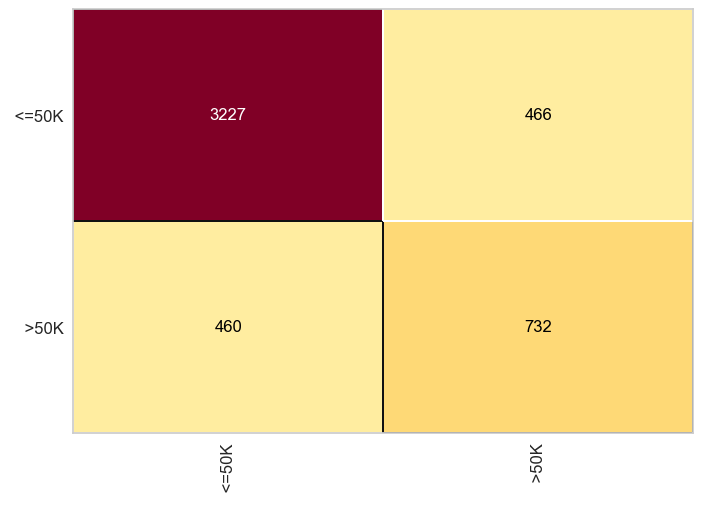

In [42]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_trein, y_census_trein)
cm.score(x_census_test, y_census_test)

In [43]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

